<a href="https://colab.research.google.com/github/gipark2001/house_price_predict/blob/master/hose_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.freecodecamp.org/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159

In [88]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [89]:
ls

hose_price.ipynb  housepricedata.csv


In [90]:
cd Colab\ Notebooks

[Errno 2] No such file or directory: 'Colab Notebooks'
/content/gdrive/My Drive/Colab Notebooks/house price


In [91]:
cd house\ price

[Errno 2] No such file or directory: 'house price'
/content/gdrive/My Drive/Colab Notebooks/house price


In [92]:
cd house\ price

[Errno 2] No such file or directory: 'house price'
/content/gdrive/My Drive/Colab Notebooks/house price


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('housepricedata.csv')

In [118]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [119]:
df.values

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [0]:
dataset = df.values

In [121]:
type(dataset)

numpy.ndarray

In [0]:
X = dataset[:,0:10]

In [0]:
Y = dataset[:,10]

In [0]:
from sklearn import preprocessing

In [125]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [0]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [129]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [0]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [133]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 522us/step - loss: 0.6749 - acc: 0.5098 - val_loss: 0.6863 - val_acc: 0.4521
Epoch 2/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.6679 - acc: 0.5117 - val_loss: 0.6805 - val_acc: 0.4521
Epoch 3/100
1022/1022 [==============================] - 0s 96us/step - loss: 0.6618 - acc: 0.5108 - val_loss: 0.6741 - val_acc: 0.4566
Epoch 4/100
1022/1022 [==============================] - 0s 94us/step - loss: 0.6561 - acc: 0.5186 - val_loss: 0.6683 - val_acc: 0.4612
Epoch 5/100
1022/1022 [==============================] - 0s 96us/step - loss: 0.6500 - acc: 0.5391 - val_loss: 0.6621 - val_acc: 0.4795
Epoch 6/100
1022/1022 [==============================] - 0s 101us/step - loss: 0.6431 - acc: 0.5714 - val_loss: 0.6545 - val_acc: 0.5982
Epoch 7/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.6358 - acc: 0.6712 - val_loss: 0.6474 - val_acc: 0.6621

In [134]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 67us/step


0.8995433770902624

The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element. To only output the accuracy, simply access the second element (which is indexed by 1, since the first element starts its indexing from 0).

Summary: Coding up our first neural network required only a few lines of code:<br>
<ol>
<li>We specify the architecture with the Keras Sequential model.</li>
<li>We specify some of our settings (optimizer, loss function, metrics to track) with model.compile</li>
<li>We train our model (find the best parameters for our architecture) with the training data with model.fit</li>
<li>We evaluate our model on the test set with model.evaluate</li>
</ol>

In [0]:
import matplotlib.pyplot as plt

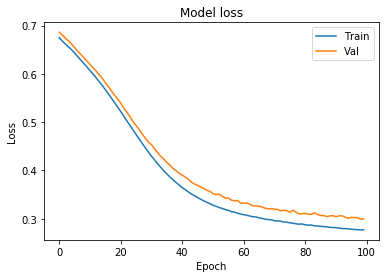

In [136]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

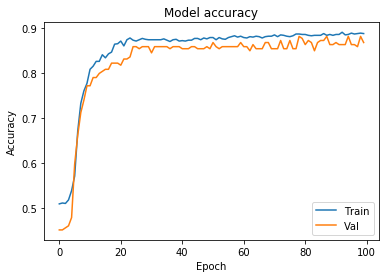

In [137]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#Adding Regularization to our Neural Network

For the sake of introducing regularization to our neural network, let’s formulate with a neural network that will badly overfit on our training set. We’ll call this Model 2.

In [138]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 941us/step - loss: 0.5033 - acc: 0.7495 - val_loss: 0.4174 - val_acc: 0.7991
Epoch 2/100
1022/1022 [==============================] - 0s 193us/step - loss: 0.3367 - acc: 0.8659 - val_loss: 0.3575 - val_acc: 0.8128
Epoch 3/100
1022/1022 [==============================] - 0s 184us/step - loss: 0.3325 - acc: 0.8532 - val_loss: 0.3327 - val_acc: 0.8447
Epoch 4/100
1022/1022 [==============================] - 0s 177us/step - loss: 0.3103 - acc: 0.8767 - val_loss: 0.2978 - val_acc: 0.8767
Epoch 5/100
1022/1022 [==============================] - 0s 169us/step - loss: 0.2853 - acc: 0.8914 - val_loss: 0.3089 - val_acc: 0.8493
Epoch 6/100
1022/1022 [==============================] - 0s 171us/step - loss: 0.2878 - acc: 0.8845 - val_loss: 0.2945 - val_acc: 0.8813
Epoch 7/100
1022/1022 [==============================] - 0s 177us/step - loss: 0.2536 - acc: 0.8982 - val_loss: 0.3040 - val_acc: 0

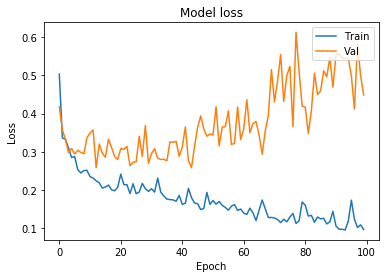

In [139]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

This is a clear sign of over-fitting. The training loss is decreasing, but the validation loss is way above the training loss and increasing (past the inflection point of Epoch 20). If we plot accuracy using the code below:



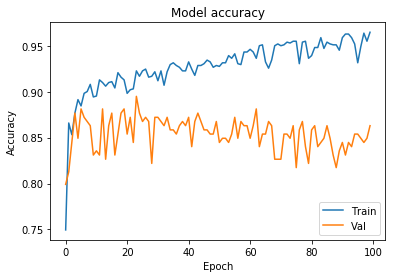

In [140]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see a clearer divergence between train and validation accuracy as well:

Now, let’s try out some of our strategies to reduce over-fitting (apart from changing our architecture back to our first model). Remember from Intuitive Deep Learning Part 1b that we introduced three strategies to reduce over-fitting.

Of the three, we’ll incorporate L2 regularization and dropout here. The reason we don’t add early stopping here is because after we’ve used the first two strategies, the validation loss doesn’t take the U-shape we see above and so early stopping will not be as effective.

First, let’s import the code that we need for L2 regularization and dropout:

In [0]:
from keras.layers import Dropout
from keras import regularizers

We then specify our third model like this:

In [142]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Can you spot the differences between Model 3 and Model 2? There are two main differences:

Difference 1: To add L2 regularization, notice that we’ve added a bit of extra code in each of our dense layers like this: 
    
kernel_regularizer=regularizers.l2(0.01)

This tells Keras to include the squared values of those parameters in our overall loss function, and weight them by 0.01 in the loss function.

Difference 2: To add Dropout, we added a new layer like this:

Dropout(0.3),

This means that the neurons in the previous layer has a probability of 0.3 in dropping out during training. Let’s compile it and run it with the same parameters as our Model 2 (the overfitting one):

In [143]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 1ms/step - loss: 14.2352 - acc: 0.6096 - val_loss: 3.9134 - val_acc: 0.7854
Epoch 2/100
1022/1022 [==============================] - 0s 223us/step - loss: 1.6726 - acc: 0.8209 - val_loss: 0.7939 - val_acc: 0.7900
Epoch 3/100
1022/1022 [==============================] - 0s 213us/step - loss: 0.5737 - acc: 0.8552 - val_loss: 0.5133 - val_acc: 0.8813
Epoch 4/100
1022/1022 [==============================] - 0s 214us/step - loss: 0.4944 - acc: 0.8806 - val_loss: 0.5894 - val_acc: 0.8037
Epoch 5/100
1022/1022 [==============================] - 0s 215us/step - loss: 0.4981 - acc: 0.8650 - val_loss: 0.5334 - val_acc: 0.8311
Epoch 6/100
1022/1022 [==============================] - 0s 218us/step - loss: 0.4985 - acc: 0.8630 - val_loss: 0.4973 - val_acc: 0.8584
Epoch 7/100
1022/1022 [==============================] - 0s 225us/step - loss: 0.4737 - acc: 0.8806 - val_loss: 0.4760 - val_acc: 0.

And now, let’s plot the loss and accuracy graphs. You’ll notice that the loss is a lot higher at the start, and that’s because we’ve changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting:

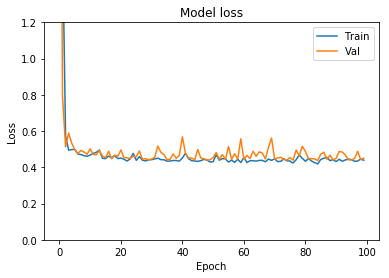

In [146]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

You can see that the validation loss much more closely matches our training loss. Let’s plot the accuracy with similar code snippet:

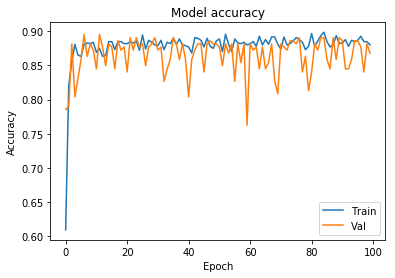

In [147]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Compared to our model in Model 2, we’ve reduced overfitting substantially! And that’s how we apply our regularization techniques to reduce overfitting to the training set.

Summary: To deal with overfitting, we can code in the following strategies into our model each with about one line of code:
<ul>
<li>L2 Regularization</li>
<li>Dropout</li>
</ul>
If we visualize the training / validation loss and accuracy, we can see that these additions have helped deal with overfitting!

Consolidated Summary:
In this post, we’ve written Python code to:
<ul>
<li>Explore and Process the Data</li>
<li>Build and Train our Neural Network</li>
<li>Visualize Loss and Accuracy</li>
<li>Add Regularization to our Neural Network</li>
</ul>
We’ve been through a lot, but we haven’t written too many lines of code! Building and Training our Neural Network has only taken about 4 to 5 lines of code, and experimenting with different model architectures is just a simple matter of swapping in different layers or changing different hyperparameters. Keras has indeed made it a lot easier to build our neural networks, and we’ll continue to use it for more advanced applications in Computer Vision and Natural Language Processing.